In [62]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor

Data Set Information:

Many variables are included so that algorithms that select or learn weights for attributes could be tested. However, clearly unrelated attributes were not included; attributes were picked if there was any plausible connection to crime (N=122), plus the attribute to be predicted (Per Capita Violent Crimes). The variables included in the dataset involve the community, such as the percent of the population considered urban, and the median family income, and involving law enforcement, such as per capita number of police officers, and percent of officers assigned to drug units.

The per capita violent crimes variable was calculated using population and the sum of crime variables considered violent crimes in the United States: murder, rape, robbery, and assault. There was apparently some controversy in some states concerning the counting of rapes. These resulted in missing values for rape, which resulted in incorrect values for per capita violent crime. These cities are not included in the dataset. Many of these omitted communities were from the midwestern USA.

Data is described below based on original values. All numeric data was normalized into the decimal range 0.00-1.00 using an Unsupervised, equal-interval binning method. Attributes retain their distribution and skew (hence for example the population attribute has a mean value of 0.06 because most communities are small). E.g. An attribute described as 'mean people per household' is actually the normalized (0-1) version of that value.

The normalization preserves rough ratios of values WITHIN an attribute (e.g. double the value for double the population within the available precision - except for extreme values (all values more than 3 SD above the mean are normalized to 1.00; all values more than 3 SD below the mean are nromalized to 0.00)).

However, the normalization does not preserve relationships between values BETWEEN attributes (e.g. it would not be meaningful to compare the value for whitePerCap with the value for blackPerCap for a community)

A limitation was that the LEMAS survey was of the police departments with at least 100 officers, plus a random sample of smaller departments. For our purposes, communities not found in both census and crime datasets were omitted. Many communities are missing LEMAS data.


Attribute Information:

Attribute Information: (122 predictive, 5 non-predictive, 1 goal)

-- state: US state (by number) - not counted as predictive above, but if considered, should be consided nominal (nominal)

-- county: numeric code for county - not predictive, and many missing values (numeric)

-- community: numeric code for community - not predictive and many missing values (numeric)

-- communityname: community name - not predictive - for information only (string)

-- fold: fold number for non-random 10 fold cross validation, potentially useful for debugging, paired tests - not predictive (numeric)

-- population: population for community: (numeric - decimal)

-- householdsize: mean people per household (numeric - decimal)

-- racepctblack: percentage of population that is african american (numeric - decimal)

-- racePctWhite: percentage of population that is caucasian (numeric - decimal)

-- racePctAsian: percentage of population that is of asian heritage (numeric - decimal)

-- racePctHisp: percentage of population that is of hispanic heritage (numeric - decimal)

-- agePct12t21: percentage of population that is 12-21 in age (numeric - decimal)

-- agePct12t29: percentage of population that is 12-29 in age (numeric - decimal)

-- agePct16t24: percentage of population that is 16-24 in age (numeric - decimal)

-- agePct65up: percentage of population that is 65 and over in age (numeric - decimal)

-- numbUrban: number of people living in areas classified as urban (numeric - decimal)

-- pctUrban: percentage of people living in areas classified as urban (numeric - decimal)

-- medIncome: median household income (numeric - decimal)

-- pctWWage: percentage of households with wage or salary income in 1989 (numeric - decimal)

-- pctWFarmSelf: percentage of households with farm or self employment income in 1989 (numeric - decimal)

-- pctWInvInc: percentage of households with investment / rent income in 1989 (numeric - decimal)

-- pctWSocSec: percentage of households with social security income in 1989 (numeric - decimal)

-- pctWPubAsst: percentage of households with public assistance income in 1989 (numeric - decimal)

-- pctWRetire: percentage of households with retirement income in 1989 (numeric - decimal)

-- medFamInc: median family income (differs from household income for non-family households) (numeric - decimal)

-- perCapInc: per capita income (numeric - decimal)

-- whitePerCap: per capita income for caucasians (numeric - decimal)

-- blackPerCap: per capita income for african americans (numeric - decimal)

-- indianPerCap: per capita income for native americans (numeric - decimal)

-- AsianPerCap: per capita income for people with asian heritage (numeric - decimal)

-- OtherPerCap: per capita income for people with 'other' heritage (numeric - decimal)

-- HispPerCap: per capita income for people with hispanic heritage (numeric - decimal)

-- NumUnderPov: number of people under the poverty level (numeric - decimal)

-- PctPopUnderPov: percentage of people under the poverty level (numeric - decimal)

-- PctLess9thGrade: percentage of people 25 and over with less than a 9th grade education (numeric - decimal)

-- PctNotHSGrad: percentage of people 25 and over that are not high school graduates (numeric - decimal)

-- PctBSorMore: percentage of people 25 and over with a bachelors degree or higher education (numeric - decimal)

-- PctUnemployed: percentage of people 16 and over, in the labor force, and unemployed (numeric - decimal)

-- PctEmploy: percentage of people 16 and over who are employed (numeric - decimal)

-- PctEmplManu: percentage of people 16 and over who are employed in manufacturing (numeric - decimal)

-- PctEmplProfServ: percentage of people 16 and over who are employed in professional services (numeric - decimal)

-- PctOccupManu: percentage of people 16 and over who are employed in manufacturing (numeric - decimal) ########

-- PctOccupMgmtProf: percentage of people 16 and over who are employed in management or professional occupations 
(numeric - decimal)

-- MalePctDivorce: percentage of males who are divorced (numeric - decimal)

-- MalePctNevMarr: percentage of males who have never married (numeric - decimal)

-- FemalePctDiv: percentage of females who are divorced (numeric - decimal)

-- TotalPctDiv: percentage of population who are divorced (numeric - decimal)

-- PersPerFam: mean number of people per family (numeric - decimal)

-- PctFam2Par: percentage of families (with kids) that are headed by two parents (numeric - decimal)

-- PctKids2Par: percentage of kids in family housing with two parents (numeric - decimal)

-- PctYoungKids2Par: percent of kids 4 and under in two parent households (numeric - decimal)

-- PctTeen2Par: percent of kids age 12-17 in two parent households (numeric - decimal)

-- PctWorkMomYoungKids: percentage of moms of kids 6 and under in labor force (numeric - decimal)

-- PctWorkMom: percentage of moms of kids under 18 in labor force (numeric - decimal)

-- NumIlleg: number of kids born to never married (numeric - decimal)

-- PctIlleg: percentage of kids born to never married (numeric - decimal)

-- NumImmig: total number of people known to be foreign born (numeric - decimal)

-- PctImmigRecent: percentage of _immigrants_ who immigated within last 3 years (numeric - decimal)

-- PctImmigRec5: percentage of _immigrants_ who immigated within last 5 years (numeric - decimal)

-- PctImmigRec8: percentage of _immigrants_ who immigated within last 8 years (numeric - decimal)

-- PctImmigRec10: percentage of _immigrants_ who immigated within last 10 years (numeric - decimal)

-- PctRecentImmig: percent of _population_ who have immigrated within the last 3 years (numeric - decimal)

-- PctRecImmig5: percent of _population_ who have immigrated within the last 5 years (numeric - decimal)

-- PctRecImmig8: percent of _population_ who have immigrated within the last 8 years (numeric - decimal)

-- PctRecImmig10: percent of _population_ who have immigrated within the last 10 years (numeric - decimal)

-- PctSpeakEnglOnly: percent of people who speak only English (numeric - decimal)

-- PctNotSpeakEnglWell: percent of people who do not speak English well (numeric - decimal)

-- PctLargHouseFam: percent of family households that are large (6 or more) (numeric - decimal)

-- PctLargHouseOccup: percent of all occupied households that are large (6 or more people) (numeric - decimal)

-- PersPerOccupHous: mean persons per household (numeric - decimal)

-- PersPerOwnOccHous: mean persons per owner occupied household (numeric - decimal)

-- PersPerRentOccHous: mean persons per rental household (numeric - decimal)

-- PctPersOwnOccup: percent of people in owner occupied households (numeric - decimal)

-- PctPersDenseHous: percent of persons in dense housing (more than 1 person per room) (numeric - decimal)

-- PctHousLess3BR: percent of housing units with less than 3 bedrooms (numeric - decimal)

-- MedNumBR: median number of bedrooms (numeric - decimal)

-- HousVacant: number of vacant households (numeric - decimal)

-- PctHousOccup: percent of housing occupied (numeric - decimal)

-- PctHousOwnOcc: percent of households owner occupied (numeric - decimal)

-- PctVacantBoarded: percent of vacant housing that is boarded up (numeric - decimal)

-- PctVacMore6Mos: percent of vacant housing that has been vacant more than 6 months (numeric - decimal)

-- MedYrHousBuilt: median year housing units built (numeric - decimal)

-- PctHousNoPhone: percent of occupied housing units without phone (in 1990, this was rare!) (numeric - decimal)

-- PctWOFullPlumb: percent of housing without complete plumbing facilities (numeric - decimal)

-- OwnOccLowQuart: owner occupied housing - lower quartile value (numeric - decimal)

-- OwnOccMedVal: owner occupied housing - median value (numeric - decimal)

-- OwnOccHiQuart: owner occupied housing - upper quartile value (numeric - decimal)

-- RentLowQ: rental housing - lower quartile rent (numeric - decimal)

-- RentMedian: rental housing - median rent (Census variable H32B from file STF1A) (numeric - decimal)

-- RentHighQ: rental housing - upper quartile rent (numeric - decimal)

-- MedRent: median gross rent (Census variable H43A from file STF3A - includes utilities) (numeric - decimal)

-- MedRentPctHousInc: median gross rent as a percentage of household income (numeric - decimal)

-- MedOwnCostPctInc: median owners cost as a percentage of household income - for owners with a mortgage (numeric - 
decimal)

-- MedOwnCostPctIncNoMtg: median owners cost as a percentage of household income - for owners without a mortgage 
(numeric - decimal)

-- NumInShelters: number of people in homeless shelters (numeric - decimal)

-- NumStreet: number of homeless people counted in the street (numeric - decimal)

-- PctForeignBorn: percent of people foreign born (numeric - decimal)

-- PctBornSameState: percent of people born in the same state as currently living (numeric - decimal)

-- PctSameHouse85: percent of people living in the same house as in 1985 (5 years before) (numeric - decimal)

-- PctSameCity85: percent of people living in the same city as in 1985 (5 years before) (numeric - decimal)

-- PctSameState85: percent of people living in the same state as in 1985 (5 years before) (numeric - decimal)

-- LemasSwornFT: number of sworn full time police officers (numeric - decimal)

-- LemasSwFTPerPop: sworn full time police officers per 100K population (numeric - decimal)

-- LemasSwFTFieldOps: number of sworn full time police officers in field operations (on the street as opposed to 
administrative etc) (numeric - decimal)

-- LemasSwFTFieldPerPop: sworn full time police officers in field operations (on the street as opposed to 
administrative etc) per 100K population (numeric - decimal)

-- LemasTotalReq: total requests for police (numeric - decimal)

-- LemasTotReqPerPop: total requests for police per 100K popuation (numeric - decimal)

-- PolicReqPerOffic: total requests for police per police officer (numeric - decimal)

-- PolicPerPop: police officers per 100K population (numeric - decimal)

-- RacialMatchCommPol: a measure of the racial match between the community and the police force. High values indicate 
proportions in community and police force are similar (numeric - decimal)

-- PctPolicWhite: percent of police that are caucasian (numeric - decimal)

-- PctPolicBlack: percent of police that are african american (numeric - decimal)

-- PctPolicHisp: percent of police that are hispanic (numeric - decimal)

-- PctPolicAsian: percent of police that are asian (numeric - decimal)

-- PctPolicMinor: percent of police that are minority of any kind (numeric - decimal)

-- OfficAssgnDrugUnits: number of officers assigned to special drug units (numeric - decimal)

-- NumKindsDrugsSeiz: number of different kinds of drugs seized (numeric - decimal)

-- PolicAveOTWorked: police average overtime worked (numeric - decimal)

-- LandArea: land area in square miles (numeric - decimal)

-- PopDens: population density in persons per square mile (numeric - decimal)

-- PctUsePubTrans: percent of people using public transit for commuting (numeric - decimal)

-- PolicCars: number of police cars (numeric - decimal)

-- PolicOperBudg: police operating budget (numeric - decimal)

-- LemasPctPolicOnPatr: percent of sworn full time police officers on patrol (numeric - decimal)

-- LemasGangUnitDeploy: gang unit deployed (numeric - decimal - but really ordinal - 0 means NO, 1 means YES, 0.5 
means Part Time)

-- LemasPctOfficDrugUn: percent of officers assigned to drug units (numeric - decimal)

-- PolicBudgPerPop: police operating budget per population (numeric - decimal)

-- ViolentCrimesPerPop: total number of violent crimes per 100K popuation (numeric - decimal) GOAL attribute (to be 
predicted)



In [2]:
df = pd.read_csv("communities.data",header = None)

In [3]:
column_names = ['state',
'county',
'community',
'communityname',
'fold',
'population',
'householdsize',
'racepctblack',
'racePctWhite',
'racePctAsian',
'racePctHisp',
'agePct12t21',
'agePct12t29',
'agePct16t24',
'agePct65up',
'numbUrban',
'pctUrban',
'medIncome',
'pctWWage',
'pctWFarmSelf',
'pctWInvInc',
'pctWSocSec',
'pctWPubAsst',
'pctWRetire',
'medFamInc',
'perCapInc',
'whitePerCap',
'blackPerCap',
'indianPerCap',
'AsianPerCap',
'OtherPerCap',
'HispPerCap',
'NumUnderPov',
'PctPopUnderPov',
'PctLess9thGrade',
'PctNotHSGrad',
'PctBSorMore',
'PctUnemployed',
'PctEmploy',
'PctEmplManu',
'PctEmplProfServ',
'PctOccupManu',
'PctOccupMgmtProf',
'MalePctDivorce',
'MalePctNevMarr',
'FemalePctDiv',
'TotalPctDiv',
'PersPerFam',
'PctFam2Par',
'PctKids2Par',
'PctYoungKids2Par',
'PctTeen2Par',
'PctWorkMomYoungKids',
'PctWorkMom',
'NumIlleg',
'PctIlleg',
'NumImmig',
'PctImmigRecent',
'PctImmigRec5',
'PctImmigRec8',
'PctImmigRec10',
'PctRecentImmig',
'PctRecImmig5',
'PctRecImmig8',
'PctRecImmig10',
'PctSpeakEnglOnly',
'PctNotSpeakEnglWell',
'PctLargHouseFam',
'PctLargHouseOccup',
'PersPerOccupHous',
'PersPerOwnOccHous',
'PersPerRentOccHous',
'PctPersOwnOccup',
'PctPersDenseHous',
'PctHousLess3BR',
'MedNumBR',
'HousVacant',
'PctHousOccup',
'PctHousOwnOcc',
'PctVacantBoarded',
'PctVacMore6Mos',
'MedYrHousBuilt',
'PctHousNoPhone',
'PctWOFullPlumb',
'OwnOccLowQuart',
'OwnOccMedVal',
'OwnOccHiQuart',
'RentLowQ',
'RentMedian',
'RentHighQ',
'MedRent',
'MedRentPctHousInc',
'MedOwnCostPctInc',
'MedOwnCostPctIncNoMtg',
'NumInShelters',
'NumStreet',
'PctForeignBorn',
'PctBornSameState',
'PctSameHouse85',
'PctSameCity85',
'PctSameState85',
'LemasSwornFT',
'LemasSwFTPerPop',
'LemasSwFTFieldOps',
'LemasSwFTFieldPerPop',
'LemasTotalReq',
'LemasTotReqPerPop',
'PolicReqPerOffic',
'PolicPerPop',
'RacialMatchCommPol',
'PctPolicWhite',
'PctPolicBlack',
'PctPolicHisp',
'PctPolicAsian',
'PctPolicMinor',
'OfficAssgnDrugUnits',
'NumKindsDrugsSeiz',
'PolicAveOTWorked',
'LandArea',
'PopDens',
'PctUsePubTrans',
'PolicCars',
'PolicOperBudg',
'LemasPctPolicOnPatr',
'LemasGangUnitDeploy',
'LemasPctOfficDrugUn',
'PolicBudgPerPop',
'ViolentCrimesPerPop']

In [4]:
df.columns = column_names

In [5]:
df

state county community        communityname  fold  population  \
0         8      ?         ?         Lakewoodcity     1        0.19   
1        53      ?         ?          Tukwilacity     1        0.00   
2        24      ?         ?         Aberdeentown     1        0.00   
3        34      5     81440  Willingborotownship     1        0.04   
4        42     95      6096    Bethlehemtownship     1        0.01   
...     ...    ...       ...                  ...   ...         ...   
1989     12      ?         ?    TempleTerracecity    10        0.01   
1990      6      ?         ?          Seasidecity    10        0.05   
1991      9      9     80070        Waterburytown    10        0.16   
1992     25     17     72600          Walthamcity    10        0.08   
1993      6      ?         ?          Ontariocity    10        0.20   

      householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0              0.33          0.02          0.90          0.12  ...      0.12   
1              0.16          0.12          0.74          0.45  ...      0.02   
2              0.42          0.49          0.56          0.17  ...      0.01   
3              0.77          1.00          0.08          0.12  ...      0.02   
4              0.55          0.02          0.95          0.09  ...      0.04   
...             ...           ...           ...           ...  ...       ...   
1989           0.40          0.10          0.87          0.12  ...      0.01   
1990           0.96          0.46          0.28          0.83  ...      0.02   
1991           0.37          0.25          0.69          0.04  ...      0.08   
1992           0.51          0.06          0.87          0.22  ...      0.03   
1993           0.78          0.14          0.46          0.24  ...      0.11   

      PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0        0.26            0.20       0.06           0.04                  0.9   
1        0.12            0.45          ?              ?                    ?   
2        0.21            0.02          ?              ?                    ?   
3        0.39            0.28          ?              ?                    ?   
4        0.09            0.02          ?              ?                    ?   
...       ...             ...        ...            ...                  ...   
1989     0.28            0.05          ?              ?                    ?   
1990     0.37            0.20          ?              ?                    ?   
1991     0.32            0.18       0.08           0.06                 0.78   
1992     0.38            0.33       0.02           0.02                 0.79   
1993     0.30            0.05       0.08           0.04                 0.73   

      LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0                     0.5                 0.32             0.14   
1                       ?                 0.00                ?   
2                       ?                 0.00                ?   
3                       ?                 0.00                ?   
4                       ?                 0.00                ?   
...                   ...                  ...              ...   
1989                    ?                 0.00                ?   
1990                    ?                 0.00                ?   
1991                    0                 0.91             0.28   
1992                    0                 0.22             0.18   
1993                  0.5                 1.00             0.13   

      ViolentCrimesPerPop  
0                    0.20  
1                    0.67  
2                    0.43  
3                    0.12  
4                    0.03  
...                   ...  
1989                 0.09  
1990                 0.45  
1991                 0.23  
1992                 0.19  
1993                 0.48  

[1994 rows x 128 columns]

Removing the first 5 columns as they are non-predictive and have many missing values

In [6]:
df = df.iloc[:,5:]

In [14]:
df[df == "?"].dropna(how= 'all')

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
1            NaN            NaN           NaN           NaN           NaN   
2            NaN            NaN           NaN           NaN           NaN   
3            NaN            NaN           NaN           NaN           NaN   
4            NaN            NaN           NaN           NaN           NaN   
5            NaN            NaN           NaN           NaN           NaN   
...          ...            ...           ...           ...           ...   
1986         NaN            NaN           NaN           NaN           NaN   
1987         NaN            NaN           NaN           NaN           NaN   
1988         NaN            NaN           NaN           NaN           NaN   
1989         NaN            NaN           NaN           NaN           NaN   
1990         NaN            NaN           NaN           NaN           NaN   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
1             NaN          NaN          NaN          NaN         NaN  ...   
2             NaN          NaN          NaN          NaN         NaN  ...   
3             NaN          NaN          NaN          NaN         NaN  ...   
4             NaN          NaN          NaN          NaN         NaN  ...   
5             NaN          NaN          NaN          NaN         NaN  ...   
...           ...          ...          ...          ...         ...  ...   
1986          NaN          NaN          NaN          NaN         NaN  ...   
1987          NaN          NaN          NaN          NaN         NaN  ...   
1988          NaN          NaN          NaN          NaN         NaN  ...   
1989          NaN          NaN          NaN          NaN         NaN  ...   
1990          NaN          NaN          NaN          NaN         NaN  ...   

      LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
1          NaN      NaN             NaN          ?              ?   
2          NaN      NaN             NaN          ?              ?   
3          NaN      NaN             NaN          ?              ?   
4          NaN      NaN             NaN          ?              ?   
5          NaN      NaN             NaN          ?              ?   
...        ...      ...             ...        ...            ...   
1986       NaN      NaN             NaN          ?              ?   
1987       NaN      NaN             NaN          ?              ?   
1988       NaN      NaN             NaN          ?              ?   
1989       NaN      NaN             NaN          ?              ?   
1990       NaN      NaN             NaN          ?              ?   

      LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
1                       ?                    ?                  NaN   
2                       ?                    ?                  NaN   
3                       ?                    ?                  NaN   
4                       ?                    ?                  NaN   
5                       ?                    ?                  NaN   
...                   ...                  ...                  ...   
1986                    ?                    ?                  NaN   
1987                    ?                    ?                  NaN   
1988                    ?                    ?                  NaN   
1989                    ?                    ?                  NaN   
1990                    ?                    ?                  NaN   

      PolicBudgPerPop  ViolentCrimesPerPop  
1                   ?                  NaN  
2                   ?                  NaN  
3                   ?                  NaN  
4                   ?                  NaN  
5                   ?                  NaN  
...               ...                  ...  
1986                ?                  NaN  
1987                ?                  NaN  
1988                ?                  NaN  
1989                ?   

It seems like 1675 instances has '?' in certain columns. Let's remove those columns.

In [15]:
df = df[df != "?"].dropna(axis=1)

In [16]:
df

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1989        0.01           0.40          0.10          0.87          0.12   
1990        0.05           0.96          0.46          0.28          0.83   
1991        0.16           0.37          0.25          0.69          0.04   
1992        0.08           0.51          0.06          0.87          0.22   
1993        0.20           0.78          0.14          0.46          0.24   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0            0.17         0.34         0.47         0.29        0.32  ...   
1            0.07         0.26         0.59         0.35        0.27  ...   
2            0.04         0.39         0.47         0.28        0.32  ...   
3            0.10         0.51         0.50         0.34        0.21  ...   
4            0.05         0.38         0.38         0.23        0.36  ...   
...           ...          ...          ...          ...         ...  ...   
1989         0.16         0.43         0.51         0.35        0.30  ...   
1990         0.32         0.69         0.86         0.73        0.14  ...   
1991         0.25         0.35         0.50         0.31        0.54  ...   
1992         0.10         0.58         0.74         0.63        0.41  ...   
1993         0.77         0.50         0.62         0.40        0.17  ...   

      PctForeignBorn  PctBornSameState  PctSameHouse85  PctSameCity85  \
0               0.12              0.42            0.50           0.51   
1               0.21              0.50            0.34           0.60   
2               0.14              0.49            0.54           0.67   
3               0.19              0.30            0.73           0.64   
4               0.11              0.72            0.64           0.61   
...              ...               ...             ...            ...   
1989            0.22              0.28            0.34           0.48   
1990            0.53              0.25            0.17           0.10   
1991            0.25              0.68            0.61           0.79   
1992            0.45              0.64            0.54           0.59   
1993            0.68              0.50            0.34           0.35   

      PctSameState85  LandArea  PopDens  PctUsePubTrans  LemasPctOfficDrugUn  \
0               0.64      0.12     0.26            0.20                 0.32   
1               0.52      0.02     0.12            0.45                 0.00   
2               0.56      0.01     0.21            0.02                 0.00   
3               0.65      0.02     0.39            0.28                 0.00   
4               0.53      0.04     0.09            0.02                 0.00   
...              ...       ...      ...             ...                  ...   
1989            0.39      0.01     0.28            0.05                 0.00   
1990            0.00      0.02     0.37            0.20                 0.00   
1991            0.76      0.08     0.32            0.18                 0.91   
1992            0.52      0.03     0.38            0.33                 0.22   
1993            0.68      0.11     0.30            0.05                 1.00   

      ViolentCrimesPerPop  
0                    0.20  
1                    0.67  
2                    0.43  
3                    0.12  
4                    0.03  
...                   ...  
1989                 0.09  
1990                 0.45  
1991                 0.23  
1992                 0.19  
1993      

In [17]:
ProfileReport(df,minimal=True)

The remaining columns seems okey. But we can further check their correlations among themselves.

<AxesSubplot:>

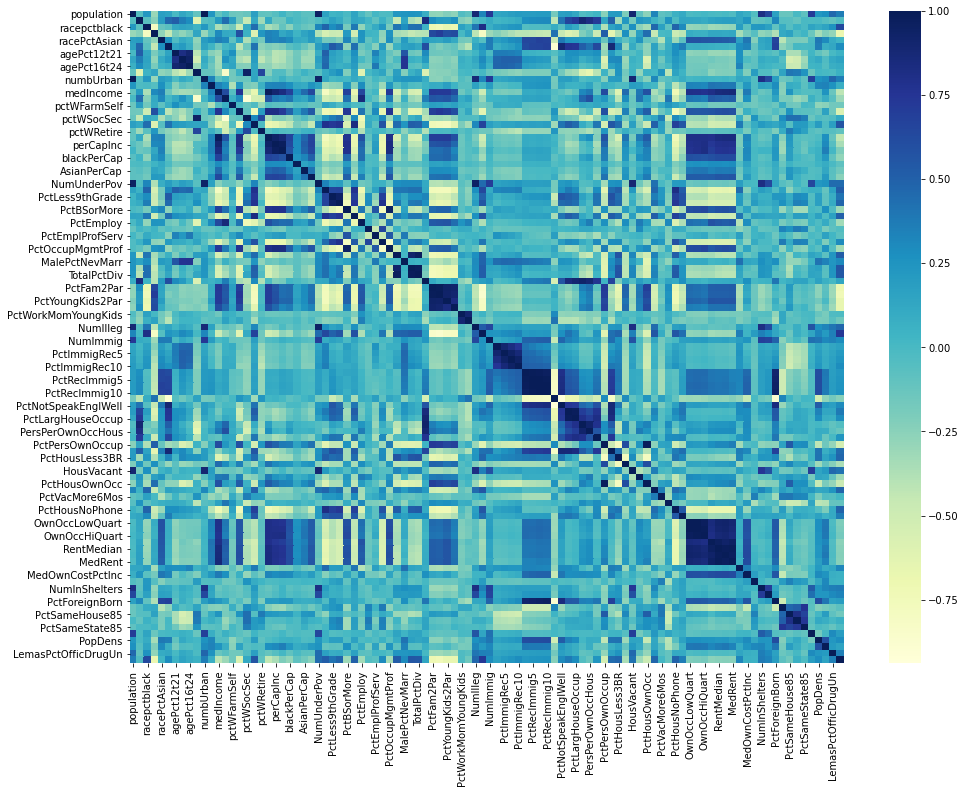

In [36]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),cmap= "YlGnBu")

It seems like there are highly correlated columns. Let's see which of them they are:

In [47]:
corr_data = df.corr()
columns = np.full((corr_data.shape[0],), True, dtype=bool)
for i in range(corr_data.shape[0]):
    for j in range(i+1, corr_data.shape[0]):
        if corr_data.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
unselected_columns = df.columns[~columns]

In [49]:
print("selected columns : \n",selected_columns)
print("unselected columns : \n",unselected_columns)

selected columns : 
 Index(['population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
       'agePct65up', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf',
       'pctWInvInc', 'pctWPubAsst', 'pctWRetire', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'HispPerCap', 'PctPopUnderPov',
       'PctLess9thGrade', 'PctBSorMore', 'PctUnemployed', 'PctEmploy',
       'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'MalePctDivorce',
       'MalePctNevMarr', 'PersPerFam', 'PctFam2Par', 'PctWorkMomYoungKids',
       'PctWorkMom', 'PctIlleg', 'NumImmig', 'PctImmigRecent',
       'PctRecentImmig', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell',
       'PctLargHouseFam', 'PersPerRentOccHous', 'PctPersOwnOccup',
       'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant',
       'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt',
       'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', '

<AxesSubplot:>

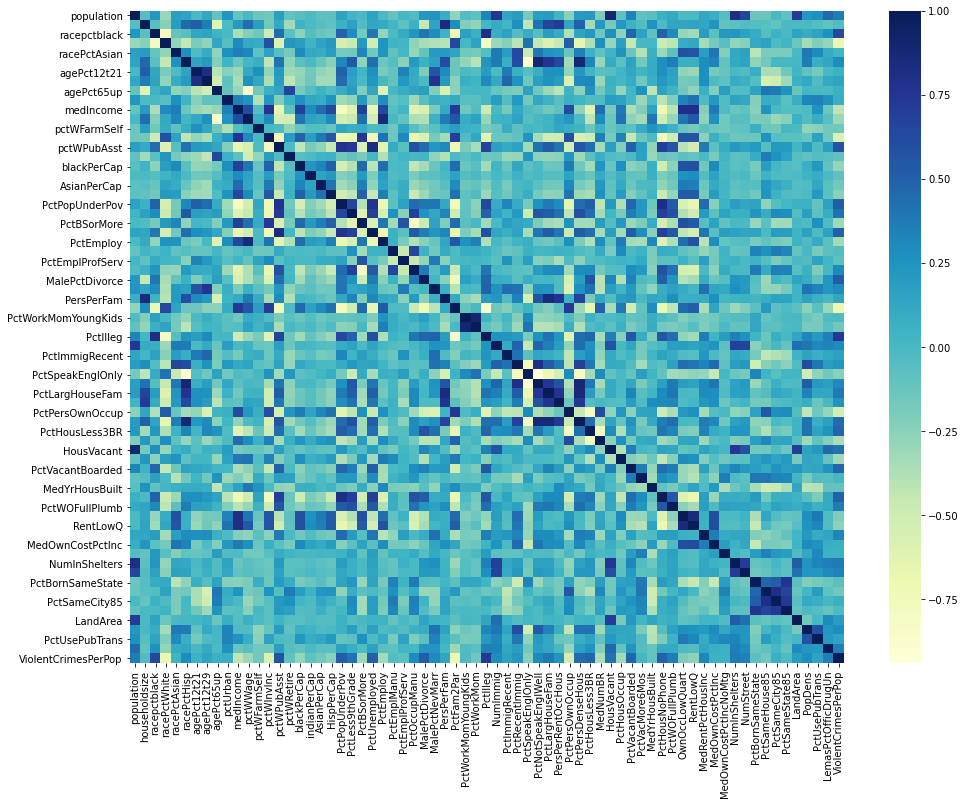

In [51]:
data_new = df[selected_columns]

corr_new = data_new.corr()

plt.figure(figsize=(16,12))

sns.heatmap(corr_new,cmap="YlGnBu")

In [53]:
y = np.asarray(df["ViolentCrimesPerPop"])
X = np.asarray(df.drop("ViolentCrimesPerPop",1))

In [55]:
X.shape

(1994, 99)

In [56]:
y.shape

(1994,)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [63]:
def get_score(model, X, y, cv):
    
    scores = cross_validate(model, X, y, cv=cv,
                        scoring = "neg_mean_absolute_error",
                        return_train_score=True)
    
    test_scores = -scores["test_score"]
    train_scores = -scores["train_score"]
    df = pd.DataFrame(columns = ["Train Score","Test Score"])
    df["Train Score"] = train_scores
    df["Test Score"] = test_scores
    
    df.loc['Mean'] = df.mean()
    df.loc['SD'] = df.std()
    
    return df

In [64]:
def get_all_scores(models, X, y, cv):
    
    df_all = pd.DataFrame(columns = ["Train Score","Test Score"])
    
    for model_name,model in models.items():
        
        df = get_score(model, X, y, cv = cv)
        df_all.loc[model_name] = df.loc["Mean"]
    
    return df_all.round({"Train Score":4,"Test Score":4})

In [ ]:
models = {"lasso": Lasso(alpha = 0.03),
          "ridge": Ridge(alpha = 500),
          "elastic": ElasticNet(),
          "cat": CatBoostRegressor(),
          "gbc": GradientBoostingRegressor(),
          "lightgbm":ltb.LGBMRegressor(),
          "rf":RandomForestRegressor(),
          "xgb":xgb.XGBRegressor(),
          "knn":KNeighborsRegressor(),
          "dt":DecisionTreeRegressor(),
          }

In [65]:
get_score(Lasso(), X, y, 5)

Train Score  Test Score
0        0.178133    0.178935
1        0.174375    0.186023
2        0.178029    0.180404
3        0.180115    0.174351
4        0.180831    0.172097
Mean     0.178297    0.178362
SD       0.002245    0.004869